In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
import time
import pylab as pl
from IPython import display

In [37]:
# Calculation du nouvelle activations des cellules

def retina(lum, tauC, k, dt, tauH, mLat):
    global horz, cone
    dCdt = (-cone - (k*horz) + lum) / tauC
    dHdt = (-horz + cone + mLat * S) / tauH
    cone += dCdt*dt
    horz += dHdt*dt

Simulation

Convertir une image en array et selectionner une image de l'ordi

In [31]:
# Conversion d'image du fiche au un matrice
BMP = imread('mona.bmp')
GRAYBMP = rgb2gray(BMP)
lum = GRAYBMP

Simulation de la retine

In [32]:
# Variables fixees
k    = 0.5  # puissance d'inhibition
dt = 0.0001  # L'etape du temps
dur = 0.1  # La durée du simulation

In [33]:
# Variables modifiables
tauC = 0.1  # constante de temps pour le cône
tauH = 0.5  # constante de temps pour la cellule horizontale
mLat = 0.2  # puissance des interactions latérales

In [34]:
def simulationRetine() :
    global k, lum, dt, dur, cone, horz, tauC, tauH, mLat
    
    # Initialization du retine
    nrows = lum.shape[0]
    ncols = lum.shape[1]

    cone = np.zeros((nrows, ncols))
    horz = np.zeros((nrows, ncols))
    
    # Executer la retine une fois
    S = np.roll(horz, 1, axis=0) + np.roll(horz, -1, axis=0) + np.roll(horz, 1, axis=1) + np.roll(horz, -1, axis=1)
    retina(lum, tauC, k, dt, tauH, mLat)

    # Demarrer la simulation de la retine
    for n in range(40):
        
        fig, axs = plt.subplots(1, 3)
        # Afficher l'activité des cônes sur premier panneau
        axs[0].imshow(cone, cmap='gray', vmin=-1, vmax=1, interpolation='nearest')
        axs[0].axis('off')

        # Afficher l'activité des cellules horizontales sur deuxieme panneau
        axs[1].imshow(horz, cmap='gray', vmin=-1, vmax=1, interpolation='nearest')
        axs[1].axis('off')
        
        # Afficher la simulation de la rétine sur troisieme panneau
        axs[2].imshow(cone + horz, cmap='gray', vmin=-1, vmax=1, interpolation='nearest')
        axs[2].axis('off')

        # Faire une pause et reafficher simulation
        display.clear_output(wait=True)
        display.display(plt.show())
        time.sleep(0.001)

        # Executer la simulation du retine quelques fois
        for t in np.arange(0, dur, dt):
            S = np.roll(horz, 1, axis=0) + np.roll(horz, -1, axis=0) + np.roll(horz, 1, axis=1) + np.roll(horz, -1, axis=1)
            retina(lum, tauC, k, dt, tauH, mLat)

    plt.close()

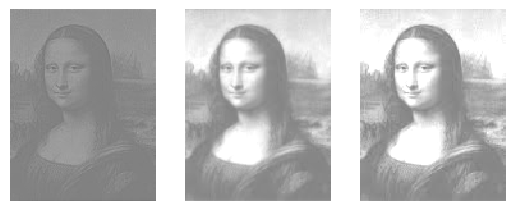

None

In [35]:
simulationRetine()

In [186]:
# Initializer un colonne
cone = 0
horz = 0

In [187]:
# Ces variables vont contenir la mémoire des activités
Cmem = []
Hmem = []
Tmem = []

In [188]:
for t in np.arange(0, dur+dt, dt):
    S = horz*4
    retina(lum, tauC, k, dt, tauH, mLat)
    

    Tmem.append(t)
    Cmem.append(cone)
    Hmem.append(horz)

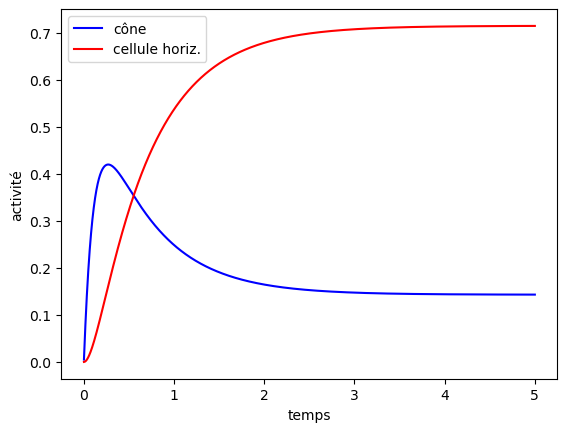

In [189]:
# Afficher les résultats
plt.figure(1)
plt.clf()
plt.plot(Tmem, Cmem, 'b')
plt.plot(Tmem, Hmem, 'r')
plt.xlabel('temps')
plt.ylabel('activité')
plt.legend(['cône', 'cellule horiz.'])